In [107]:
import torch
import numpy as np
import pandas as pd

Basic tensor construction

In [17]:
a = torch.tensor([1,2,3,34,4,4,5])
print(a) # shows tensor object
print(a[2]) # same indexing as normal

print(a.dtype) # shows how to find the data type of a tensor
print(a.type(), type(a)) # shows LongTensor which is the same as "long" data type from java and c

# you can create tensors of specific types if you want
b = torch.FloatTensor([1,2,3])
print(b) # note that my ints were converted into floats due to the float tensor method 

# c = torch.FloatTensor(['a', '2', 'd']) # this would get an error since we specified a type. it is like strong typing in c
b = b.type(torch.IntTensor) # this is how you change data types for tensors
print(b) # note that vals are converted back to ints from floats

print(len(b)) # only gets the num of elements in a tensor
print(b.size()) # shows the dimensional sizes (more info basically)
print(b.ndimension()) # shows the number of dimensions 



tensor([ 1,  2,  3, 34,  4,  4,  5])
tensor(3)
torch.int64
torch.LongTensor <class 'torch.Tensor'>
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
3
torch.Size([3])
1


converting dimensions of tensors

In [23]:
a = torch.tensor([1,2,3,4,5])

a_cols = a.view(5,1)
print(a_cols) # as you can see we converted a 1x5 array into a 5x1. using the view method
              #  very odd that the "view" method changes the structure of a data structure but anyways


tensor([[1],
        [2],
        [3],
        [4],
        [5]])


Note for below since numpy_array was used to create torch_tensor and back_to_numpy, changing numpy_array will change the latter two as well. perhaps there is a way to make a copy()?

In [29]:
a_cols_naive = a.view(-1,1) # even if we do not know the dimensions of a we can use -1 and torch will just use max dim
print(a_cols_naive)
print() 
# numpy to torch conversion (this might come up alot or dataframe to tensor conversion)
numpy_array = np.array([1,2,3,4,5,6])
print(numpy_array)
torch_tensor = torch.from_numpy(numpy_array) # convert np array into tensor
print(torch_tensor)
back_to_numpy = torch_tensor.numpy()


tensor([[1],
        [2],
        [3],
        [4],
        [5]])

[1 2 3 4 5 6]
tensor([1, 2, 3, 4, 5, 6], dtype=torch.int32)


In [37]:
# converting pandas series to tensor
pandas_series = pd.Series([1,2,3,4,5])
pandas_to_torch = torch.from_numpy(pandas_series.values) # note we needed to use the series values 
print(pandas_series)
print(pandas_to_torch)
# tensor to list conversion
this_tensor = torch.tensor([1,2,3,4])
torch2list = this_tensor.tolist()


0    1
1    2
2    3
3    4
4    5
dtype: int64
tensor([1, 2, 3, 4, 5])


just know that individual values of a tensor are also a tensor

also know that a tensor is not the same as a python number and thus we sometimes should convert a tensor element into a python number as shown below
- note that the same logic can apply with a list: use .tolist()

In [39]:
tensorTest = torch.tensor([1,2,3,45,5])
tensorElement = tensorTest[0] # this is a tensor el
print(1 + tensorElement) # okay... so note that the result is also a tensor 
tensor2python = tensorElement.item() # converts tensor to py num
print(1 + tensor2python) # note that now the result is just a normal python int

tensor(2)
2


## Indexing and slicing 
- note that slicing is using the same logic as slicing in normal python lists

In [43]:
c = torch.tensor([20,1,2,3,0])
b = c[1:4] # as with normal py left side of colon is 0 indexed, right side is 1 indexed
print(b) # slicing 
c[3:5] = torch.tensor([300.0, 400.0]) # you can change the vals of a slice and affec the og tensor on the fly
print(c) # same logic as py lists really.

tensor([1, 2, 3])
tensor([ 20,   1,   2, 300, 400])


## Vector Addition and Subtraction 

In [54]:
# first lets make the two vectors that we will use u, v 
u = torch.tensor([[1], [0]])
v = torch.tensor([[0], [1]])
print(u)
print(v)
# now let us add them and store them in z
z = u + v
print('========================')
print('u + v =', ' ')
print(z)
# now let us try vector scalar multiplication
y = torch.tensor([[1],[2]])
z = 2*y
print('========================')
print('scalar multiply 2y')
print(z)

tensor([[1],
        [0]])
tensor([[0],
        [1]])
u + v =  
tensor([[1],
        [1]])
scalar multiply 2y
tensor([[2],
        [4]])


element wise multiplication of two tensors/vectors

In [58]:
u = torch.tensor([[1], [2]])
v = torch.tensor([[3], [2]])
print('u = ')
print(u)
print('v = ')
print(v)
z = u * v
print('u * v = ')
print(z)

u = 
tensor([[1],
        [2]])
v = 
tensor([[3],
        [2]])
u * v = 
tensor([[3],
        [4]])


## dot product
- note only works on 1D tensors so the above tensors u and v had to be rewritten as 1D for this to work

In [62]:
u = torch.tensor([1,2])
v = torch.tensor([3, 1]) # note we had to convert the above tensors into 1D for the dot product to work
print('u = ')
print(u)
print('v = ')
print(v)
z = torch.dot(u, v) 
print(z)

u = 
tensor([1, 2])
v = 
tensor([3, 2])
tensor(7)


In [64]:
# "broadcasting" in torch is simple and done as follows
u = torch.tensor([1,2,34,4])
broadcastOne = u + 1 
print(broadcastOne)

tensor([ 2,  3, 35,  5])


## Universal Functions

In [80]:
a = torch.FloatTensor([1,-1,1,-1]) # we needed to use a float 
# can calc mean for all elements as follows
# note that mean only works on long or float
a_mean = a.mean()
print(a_mean)
b = torch.tensor([1,2,3,4,5])
# finding max is simple and requires no dtype like with mean
c = b.max()
print('mean is =')
print(c)

tensor(0.)
mean is =
tensor(5)


In [84]:
# can create pi with numpy as follows
np.pi
x = torch.tensor([0, np.pi/2, np.pi])
# can use TRIG functions as follows and apply them to a vector x
y = torch.sin(x)
print(y)


tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


### Line space

In [92]:
# line space creates an interval with evenly spaced elements (it is basically the range function)
x = torch.linspace(-2,2, steps=5) # looks similar to the range function tbh
print(x)
# big difference is we can have more steps than integers that would fit in our interval
# example here is we have steps=9
x = torch.linspace(-2,2, steps=9)
print(x)

tensor([-2., -1.,  0.,  1.,  2.])
tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


In [93]:
# we can use linespace to generate 100 evenly spaced nums on the interval from [0, 2pi]
x = torch.linspace(0, 2*np.pi, steps=100)
print(x)

tensor([0.0000, 0.0635, 0.1269, 0.1904, 0.2539, 0.3173, 0.3808, 0.4443, 0.5077,
        0.5712, 0.6347, 0.6981, 0.7616, 0.8251, 0.8885, 0.9520, 1.0155, 1.0789,
        1.1424, 1.2059, 1.2693, 1.3328, 1.3963, 1.4597, 1.5232, 1.5867, 1.6501,
        1.7136, 1.7771, 1.8405, 1.9040, 1.9675, 2.0309, 2.0944, 2.1579, 2.2213,
        2.2848, 2.3483, 2.4117, 2.4752, 2.5387, 2.6021, 2.6656, 2.7291, 2.7925,
        2.8560, 2.9195, 2.9829, 3.0464, 3.1099, 3.1733, 3.2368, 3.3003, 3.3637,
        3.4272, 3.4907, 3.5541, 3.6176, 3.6811, 3.7445, 3.8080, 3.8715, 3.9349,
        3.9984, 4.0619, 4.1253, 4.1888, 4.2523, 4.3157, 4.3792, 4.4427, 4.5061,
        4.5696, 4.6331, 4.6965, 4.7600, 4.8235, 4.8869, 4.9504, 5.0139, 5.0773,
        5.1408, 5.2043, 5.2677, 5.3312, 5.3947, 5.4581, 5.5216, 5.5851, 5.6485,
        5.7120, 5.7755, 5.8389, 5.9024, 5.9659, 6.0293, 6.0928, 6.1563, 6.2197,
        6.2832])


In [103]:
y = torch.sin(x) # we could in theory plot this and get a nice sine wave
print(y)

tensor([ 0.0000e+00,  6.3424e-02,  1.2659e-01,  1.8925e-01,  2.5115e-01,
         3.1203e-01,  3.7166e-01,  4.2979e-01,  4.8620e-01,  5.4064e-01,
         5.9291e-01,  6.4279e-01,  6.9008e-01,  7.3459e-01,  7.7615e-01,
         8.1458e-01,  8.4973e-01,  8.8145e-01,  9.0963e-01,  9.3415e-01,
         9.5490e-01,  9.7181e-01,  9.8481e-01,  9.9384e-01,  9.9887e-01,
         9.9987e-01,  9.9685e-01,  9.8982e-01,  9.7880e-01,  9.6384e-01,
         9.4500e-01,  9.2235e-01,  8.9599e-01,  8.6603e-01,  8.3257e-01,
         7.9576e-01,  7.5575e-01,  7.1269e-01,  6.6677e-01,  6.1816e-01,
         5.6706e-01,  5.1368e-01,  4.5823e-01,  4.0093e-01,  3.4202e-01,
         2.8173e-01,  2.2031e-01,  1.5800e-01,  9.5056e-02,  3.1728e-02,
        -3.1728e-02, -9.5056e-02, -1.5800e-01, -2.2031e-01, -2.8173e-01,
        -3.4202e-01, -4.0093e-01, -4.5823e-01, -5.1368e-01, -5.6706e-01,
        -6.1816e-01, -6.6677e-01, -7.1269e-01, -7.5575e-01, -7.9576e-01,
        -8.3257e-01, -8.6603e-01, -8.9599e-01, -9.2

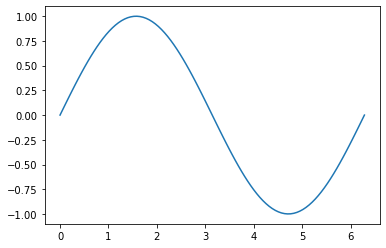

In [108]:
# LET US PLOT
import matplotlib.pyplot as plt
# in notebooks the command below to actually plot
%matplotlib inline
# note we had to convert to numpy first to use this... matplotlib does not have native support for tensors it seems
plt.plot(x.numpy(), y.numpy()) 